<a href="https://colab.research.google.com/github/2303A52060/23CSBTB39-40/blob/main/AIML_A_10_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Implement K-Means Clustering using Synthetic Data

1–Import the required Python, Pandas, Matplotlib, Seaborn packages.

Problem: you have a multidimensional set of data (such as a set of hidden unit activations) and you want to see which points are closest to others. The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

• The ”cluster center” is the arithmetic mean of all the points belonging to the cluster.

• Each point is closer to its own cluster center than to other cluster centers

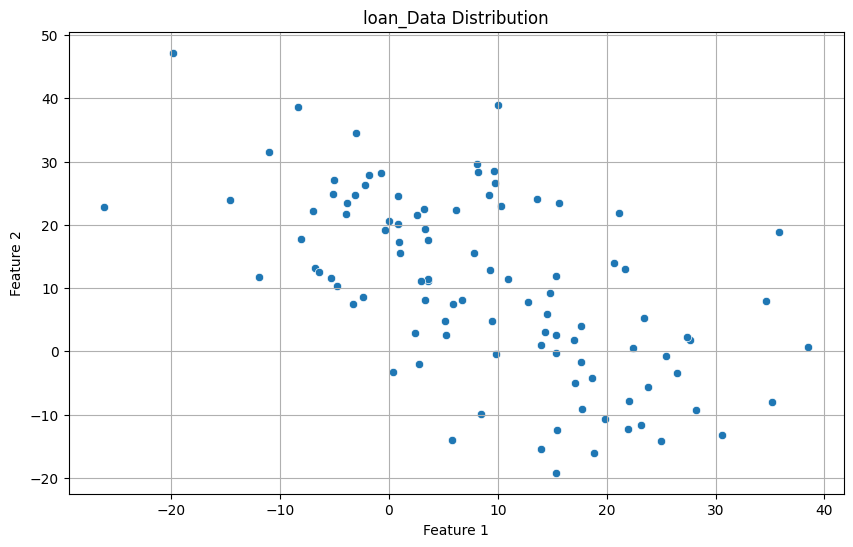

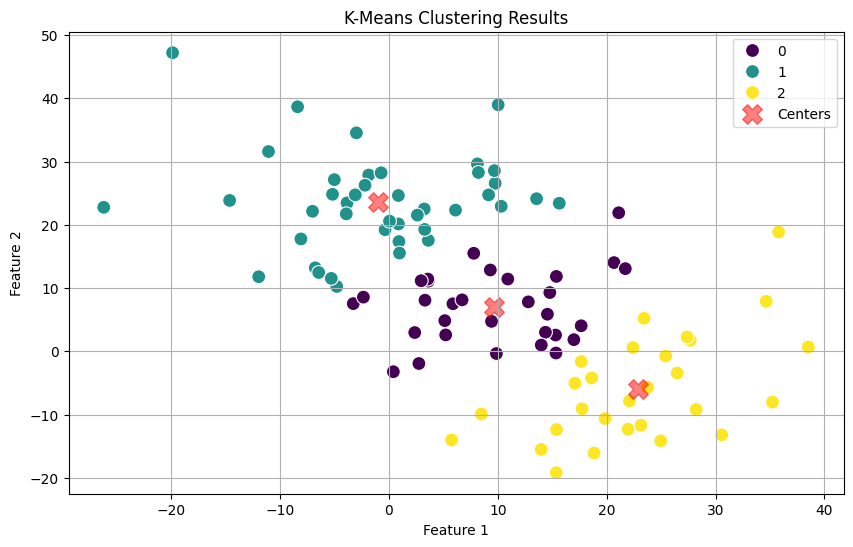

In [2]:
# Step 1: Import Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Step 2: Generate loan_Data
np.random.seed(42)
data = {
    'Feature1': np.random.randn(100) * 10,
    'Feature2': np.random.randn(100) * 10
}
df = pd.DataFrame(data)
df.loc[0:49, 'Feature1'] += 20  # Shift points for clustering
df.loc[50:99, 'Feature2'] += 20

# Step 3: Visualize the Synthetic Data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature1', y='Feature2', data=df)
plt.title('loan_Data Distribution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

# Step 4: Implement K-Means Clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Feature1', 'Feature2']])
centers = kmeans.cluster_centers_

# Step 5: Visualize the Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Cluster', data=df, palette='viridis', s=100)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='X', label='Centers')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()


2–Create loan dataset of unlabeled blobs. [CO2]

The dataset would be synthesized using sklearn datasets.samples generator from thesklearn package. You will import binary large objects- blobs to form clusters from the loan dataset

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

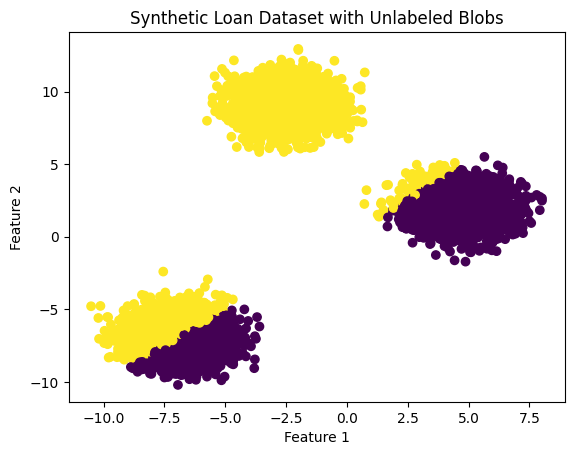

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Load the loan dataset
loan_data = pd.read_csv('loan_data.csv')

# Display the first few rows of the dataset to understand its structure
print(loan_data.head())

# Assuming the CSV has columns for features to create blobs
# For example, let's say we want to use the first two numerical columns
# You might need to change the column selection based on your actual data
features = loan_data.iloc[:, :2].values  # Adjust the column indices as needed

# Parameters for make_blobs
n_samples = len(loan_data)  # Use the same number of samples as in the original dataset
n_features = features.shape[1]  # Number of features used
n_clusters = 3  # You can adjust the number of clusters

# Generate synthetic clusters based on the original features
X, _ = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=42)

# Convert to DataFrame for easier manipulation
blob_data = pd.DataFrame(X, columns=[f'Feature{i+1}' for i in range(n_features)])
blob_data['Cluster'] = np.argmax(X, axis=1)  # Assign clusters based on blob generation

# Display the first few rows of the synthetic blob dataset
print(blob_data.head())

# Visualize the generated blobs
plt.scatter(blob_data['Feature1'], blob_data['Feature2'], c=blob_data['Cluster'], cmap='viridis', marker='o')
plt.title('Synthetic Loan Dataset with Unlabeled Blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


3–Import KMeans class from Scikit-learn and fit the data.

Verify the syntentic dataset and fit the data to the K-Means model.

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

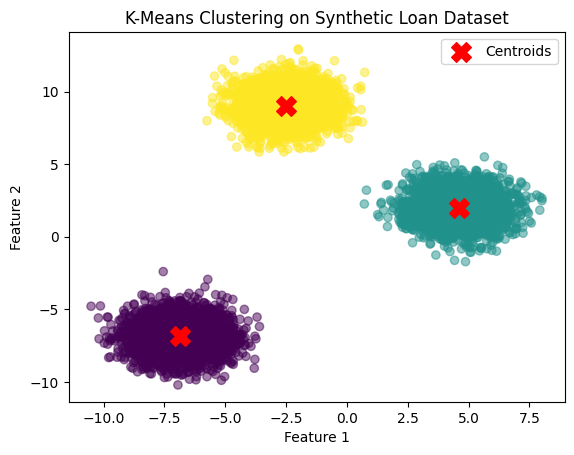

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Load the loan dataset
loan_data = pd.read_csv('loan_data.csv')

# Display the first few rows of the dataset to understand its structure
print(loan_data.head())

# Assuming the CSV has columns for features to create blobs
# For example, let's say we want to use the first two numerical columns
features = loan_data.iloc[:, :2].values  # Adjust the column indices as needed

# Parameters for make_blobs
n_samples = len(loan_data)  # Use the same number of samples as in the original dataset
n_features = features.shape[1]  # Number of features used
n_clusters = 3  # Set the number of clusters

# Generate synthetic clusters based on the original features
X, _ = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=42)

# Fit KMeans to the synthetic dataset
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Get the cluster labels from the KMeans model
labels = kmeans.labels_

# Convert to DataFrame for easier manipulation
blob_data = pd.DataFrame(X, columns=[f'Feature{i+1}' for i in range(n_features)])
blob_data['Cluster'] = labels

# Display the first few rows of the synthetic blob dataset with assigned clusters
print(blob_data.head())

# Visualize the generated blobs and K-Means clusters
plt.scatter(blob_data['Feature1'], blob_data['Feature2'], c=blob_data['Cluster'], cmap='viridis', marker='o', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('K-Means Clustering on Synthetic Loan Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


4: Visualize the fitted data by coloring the blobs by assigned label numbers.

We will use the c argument in the plt.scatter() function. We will also try to make the cluster centers prominent

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

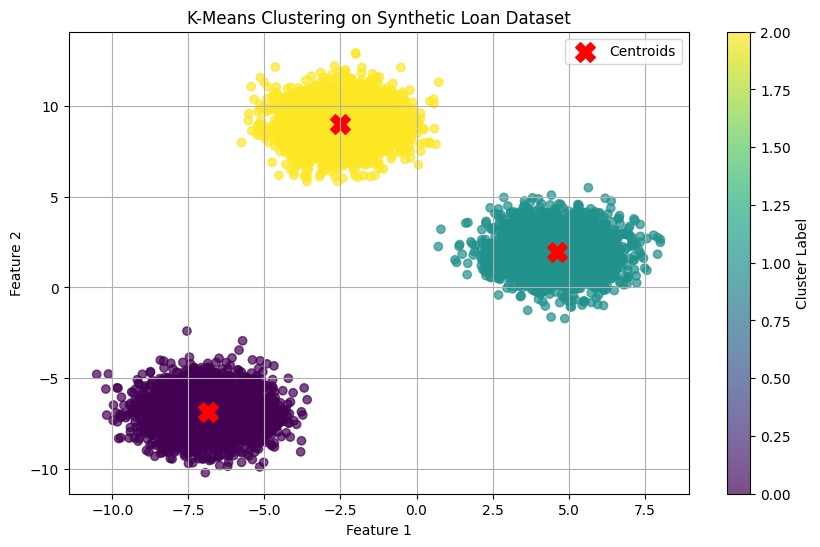

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Load the loan dataset
loan_data = pd.read_csv('loan_data.csv')

# Display the first few rows of the dataset to understand its structure
print(loan_data.head())

# Assuming the CSV has columns for features to create blobs
# For example, let's say we want to use the first two numerical columns
features = loan_data.iloc[:, :2].values  # Adjust the column indices as needed

# Parameters for make_blobs
n_samples = len(loan_data)  # Use the same number of samples as in the original dataset
n_features = features.shape[1]  # Number of features used
n_clusters = 3  # Set the number of clusters

# Generate synthetic clusters based on the original features
X, _ = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=42)

# Fit KMeans to the synthetic dataset
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Get the cluster labels from the KMeans model
labels = kmeans.labels_

# Convert to DataFrame for easier manipulation
blob_data = pd.DataFrame(X, columns=[f'Feature{i+1}' for i in range(n_features)])
blob_data['Cluster'] = labels

# Visualize the generated blobs and K-Means clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(blob_data['Feature1'], blob_data['Feature2'], c=blob_data['Cluster'], cmap='viridis', marker='o', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')

# Adding colorbar
plt.colorbar(scatter, label='Cluster Label')

# Adding titles and labels
plt.title('K-Means Clustering on Synthetic Loan Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


5-How K-Means is a special case of Expectation-maximization (EM) algorithm.

Expectation–maximization (EM) is a powerful algorithm that comes up in a variety of con-
texts within data science. k-means is a particularly simple and special case of this more
general algorithm. The basic algorithmic flow of k-means is to,

• Guess some cluster center (initialization)

• Repeat following steps untill converged,

• E-step: assign points to the nearest cluster center

• M-Step: set the cluster centers to the mean

Here the ”E-step” or ”Expectation step” involves updating our expectation of which cluster
each point belongs to.

The ”M-step” or ”Maximization step” involves maximizing some fitness function that defines the location of the cluster centers. In the case of k-means, that maximization is accomplished by taking a simple mean of the data in each cluster.

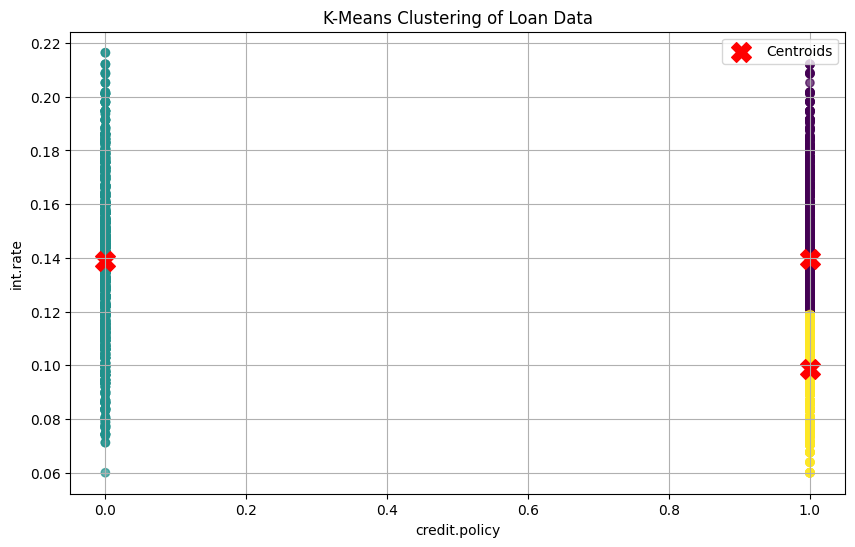

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

loan_data = pd.read_csv('loan_data.csv')

# Assuming the CSV has columns for features to use; for demonstration, we use the first two numerical columns
# Selecting only numerical features for clustering
# Adjust column indices as needed to select appropriate numerical features
numerical_features = loan_data.select_dtypes(include=np.number).iloc[:, :2]
features = numerical_features.values

# Set the number of clusters
n_clusters = 3

# Initialize KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model (E-step and M-step are performed here)
kmeans.fit(features)

# Get the cluster labels and centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Convert to DataFrame for visualization
loan_data['Cluster'] = labels

# Visualize the clustering
plt.figure(figsize=(10, 6))
# Use the numerical features for plotting
plt.scatter(numerical_features.iloc[:, 0], numerical_features.iloc[:, 1], c=loan_data['Cluster'], cmap='viridis', alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('K-Means Clustering of Loan Data')
plt.xlabel(numerical_features.columns[0]) # Set x-axis label to the first numerical feature's name
plt.ylabel(numerical_features.columns[1]) # Set y-axis label to the second numerical feature's name
plt.legend()
plt.grid(True)
plt.show()


Part 2: Implementing K-Means from Scratch.

By taking from sklearn.metrics import pairwise distances argmin we can implement
the K-Means from scratch in 3 steps as mentioned earlier.

• Randomly choose the clusters

• Assign Labels based on closest cluster center

• Find new centers by computing the means of points close to the cluster center.

• Check for convergence point.

• Plot the centers and labels using scatter plot.
Code to Implement K-Means from Scratch
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=2):

# 1. Randomly choose clusters

rng = np.random.RandomState(rseed)

i = rng.permutation(X.shape[0])[:n_clusters]

centers = X[i]

while True:

# 2a. Assign labels based on closest center

labels = pairwise_distances_argmin(X, centers)

# 2b. Find new centers from means of points

new_centers = np.array([X[labels == i].mean(0)

for i in range(n_clusters)])


# 2c. Check for convergence

if np.all(centers == new_centers):

break

centers = new_centers

return centers, labels

centers, labels = find_clusters(X, 4)

plt.scatter(X[:, 0], X[:, 1], c=labels,

s=50, cmap=’viridis’);

Although the E–M procedure is guaranteed to improve the result in each step, there is no assurance that it will lead to the global best solution. The
initialization is important and particularly bad initialization can sometimes lead to clearly sub-optimal clustering.

How many Number of clusters?

A common challenge with k-means is that you must tell it how many clusters you expect. It
cannot learn the number of clusters from the data.

If we force the k-means to look for 6 clusters instead of 4, it will come back with 6 but they may not be what we are looking for!

Some methods like elbow and silhouette analysis can be used to gauge a good number of clusters.

Limitation of K-Means Clustering

k-means algorithm will often be ineffective if the clusters have complicated geometries. In
particular, the boundaries between k-means clusters will always be linear, which means that
it will fail for more complicated boundaries. Verify the limitation using the code:

from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50,

cmap=’viridis’);

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # Step 1: Randomly choose initial clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # Step 2a: Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # Step 2b: Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

        # Step 2c: Check for convergence
        if np.all(centers == new_centers):
            break

        centers = new_centers

    return centers, labels

# Load the loan dataset
loan_data = pd.read_csv('loan_data.csv')

# Use the first two numerical columns for clustering
features = loan_data.iloc[:, :2].values  # Adjust column indices as necessary

# Set the number of clusters
n_clusters = 4  # Change as needed

# Run the K-Means algorithm
centers, labels = find_clusters(features, n_clusters)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(features[:, 0], features[:, 1], c=labels, s=50, cmap='viridis', alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('K-Means Clustering of Loan Data (Implemented from Scratch)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()
#Limitations of K-Means Clustering
from sklearn.datasets import make_moons

# Create the moons dataset
X, y = make_moons(200, noise=0.05, random_state=0)

# Fit KMeans to the moons dataset
labels = KMeans(n_clusters=2, random_state=0).fit_predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering on Non-Linear Data (Make Moons)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


ValueError: could not convert string to float: 'debt_consolidation'